In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
##Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


Description of columns
.MPG:Milege of the car (Mile per Gallon) (this is Y-column to be predicted)
.HP:Horse Power of the car(X1 column)
.Vol:Volume of the car(size)
.SP:Top speed of the car(Mile per Hour) (X3 cloumn)
.WT:Weight of the car(Pounds)(X4 column)

##Assumptions in Multilinear Regression
1.Linearity:The relation between the predictors(X) and the response (Y) is linear
2.Independence:Observations are independent of each other
3.Homoscedasticity:The residuals(Y-Y_hat) exhibit constant variance at all levels of the predictor.
4.Normal Distribution of Errors:The residuals of the model are normally distributed.
5.No multicollinearity:The independent variables should not be too highly correlated with each other.
Violations of these assumptions may lead to inefficiency in the regression 

EDA

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [15]:
#check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

Observations:
.There are no missing values
.There are 81 Observations (81 different cars data)
.The data types of the columns are also relevant and valid

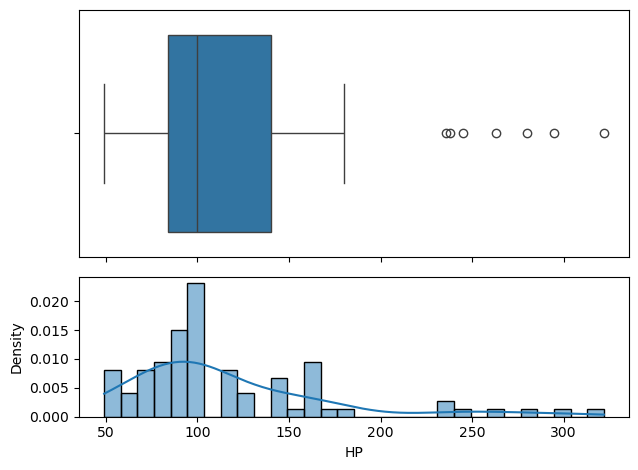

In [19]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                                                   

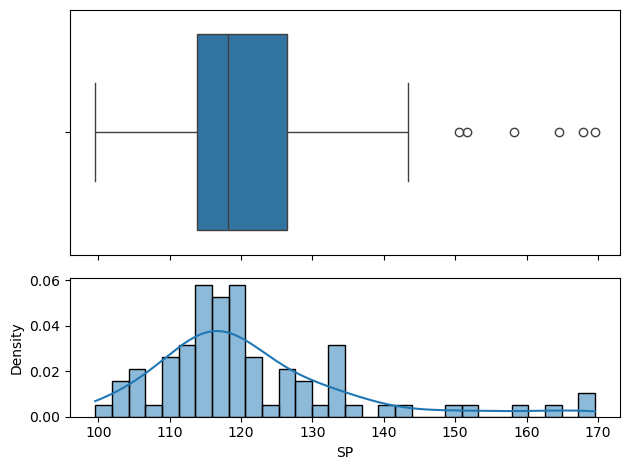

In [21]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

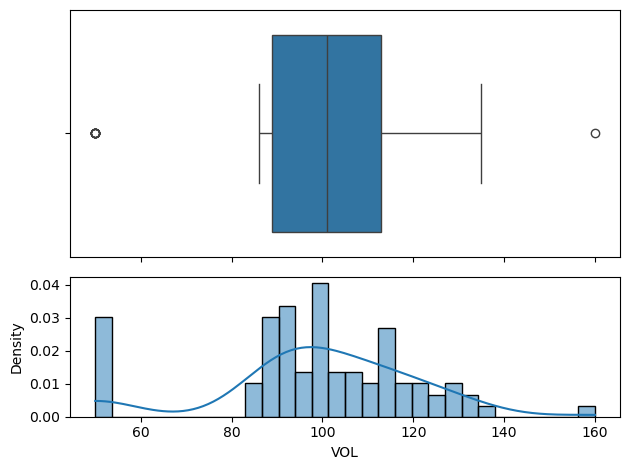

In [27]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

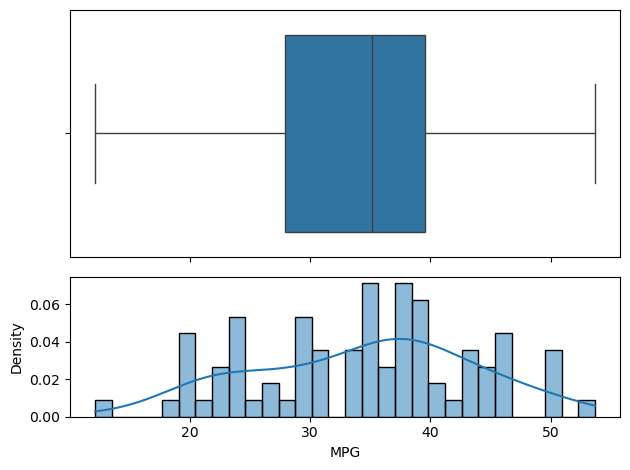

In [29]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

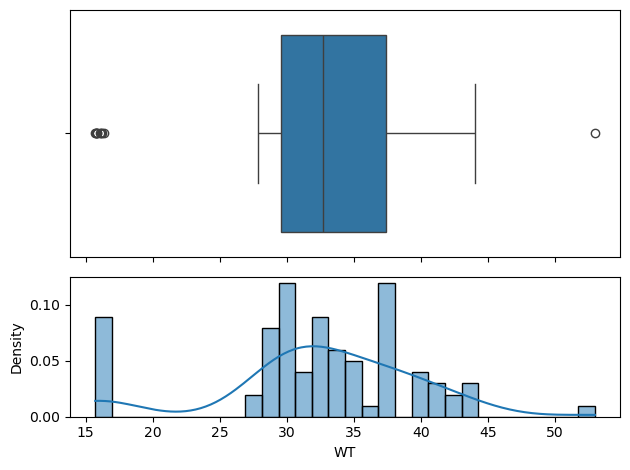

In [33]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

Observations:
-There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
-In VOL and WT columns, a few outliers are observed in both tails of distributions.
-The extreme values of cars data may have come from specially designed nature of cars
-As this is multi-dimensional data, theoutliers with respect to spatial dimensions may have to be considered while building the regression model.

Checking for duplicated rows

In [38]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


#Pair plots and COrrelation Coefficients


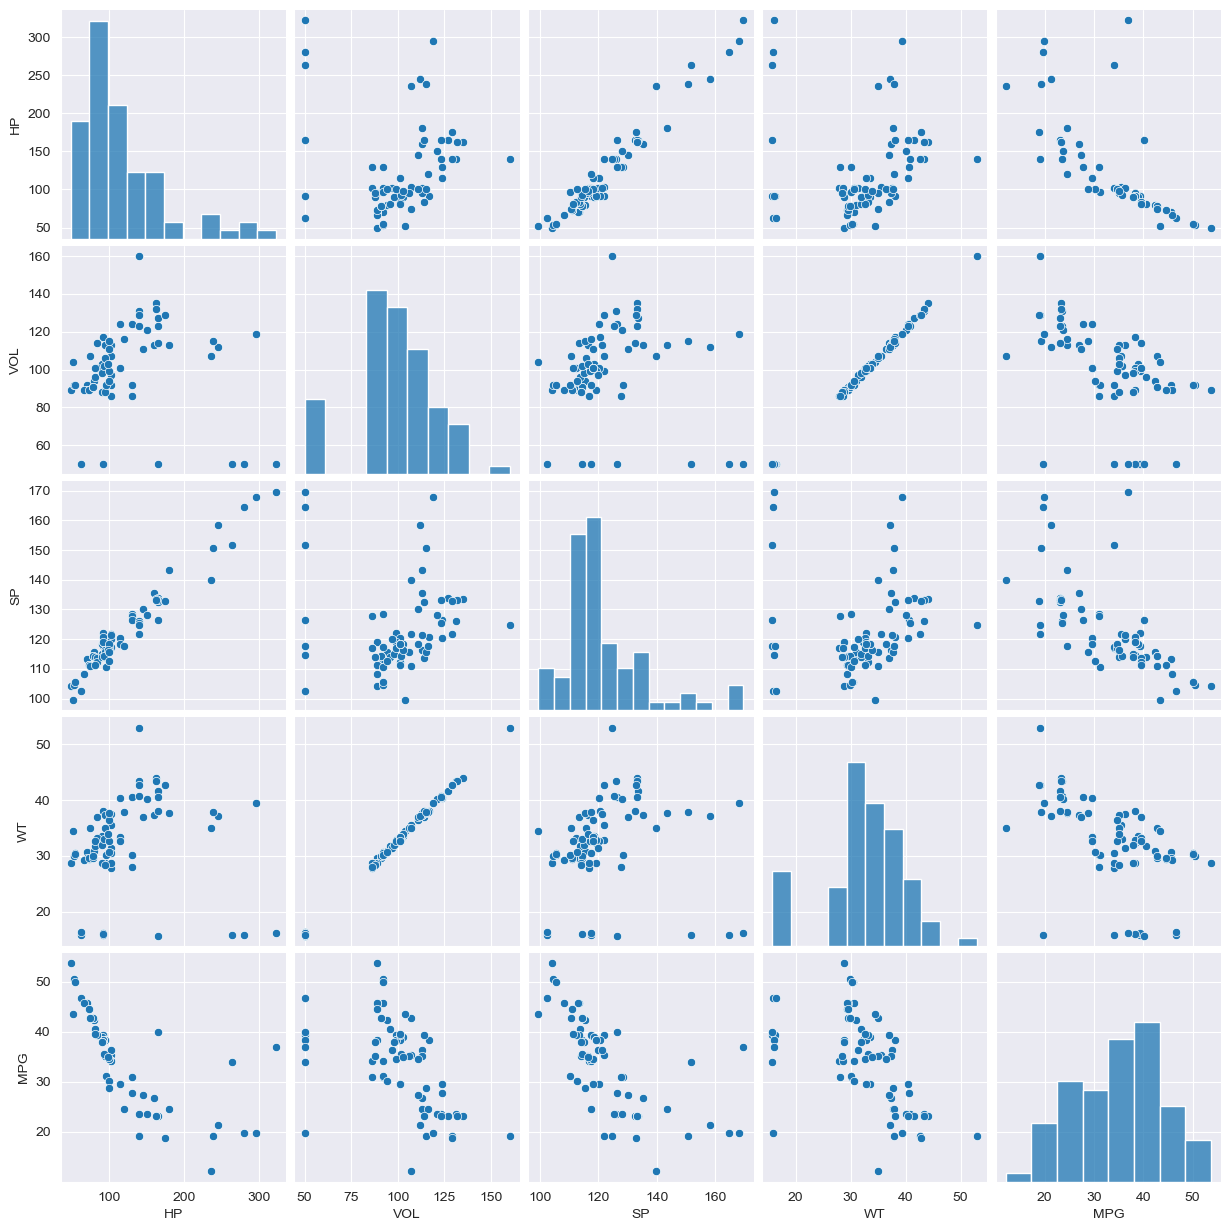

In [45]:
#pair plots
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [49]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000
